## Predicting price of pre-owned cars

Strom Motors is an e-commerce company who act as mediators between parties interested in selling and buying pre-owned cars.

For the year 2015-15 they have recorded data about the seller and car including - 
        specification details
        condition of car
        seller details
        registration details
        web advertisement details
        make and model information
        price

Strom Motors wishes to develop an algorithm to predict the price of the cars based on various attributes associated with the car

In [180]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns

In [181]:
# setting dimensions for plot
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [182]:
cars_data = pd.read_csv(r"C:\Users\teesh\Downloads\cars_sampled.csv")

In [183]:
cars_data

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,3/4/2016 0:00,29690,5/4/2016 15:16
49997,27/03/2016 14:55,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,27/03/2016 0:00,50181,7/4/2016 11:45
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,15/03/2016 0:00,65232,6/4/2016 17:15


In [184]:
cars = cars_data.copy(deep = True)

In [185]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [186]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [187]:
pd.set_option('display.float_format',lambda x: '%.3f' % x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [188]:
pd.set_option('display.max_columns',500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [189]:
# dropping unwanted columns
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col,axis=1)

In [190]:
display(cars)
cars.shape

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN
49997,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN
49998,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no
49999,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN


(50001, 14)

In [191]:
# removing duplicate records
cars.drop_duplicates(keep='first',inplace=True)

In [192]:
cars.shape

(49531, 14)

In [193]:
# data cleaning
# finding number of missing values under each column
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [194]:
# yearOfRegistration
yearwise_count = cars["yearOfRegistration"].value_counts().sort_index()
display(yearwise_count)

1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64

## years which are after 2019 needs to be cleaned

In [195]:
sum(cars['yearOfRegistration']>2018)

26

In [196]:
sum(cars['yearOfRegistration']<1950)

38

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

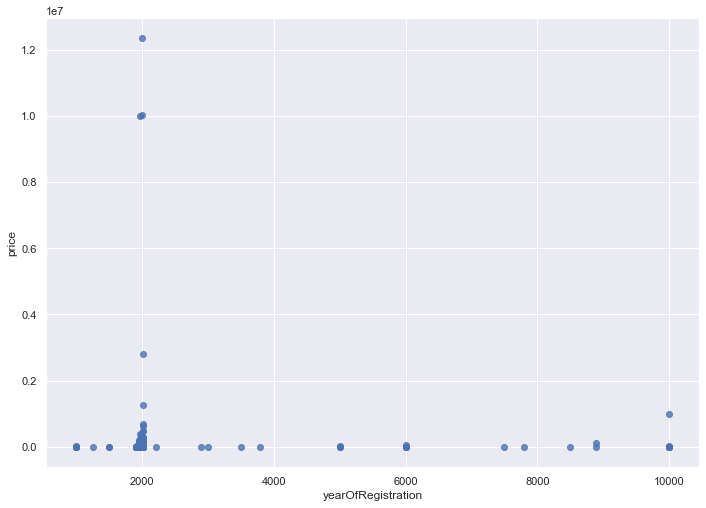

In [197]:
sns.regplot(x='yearOfRegistration', y='price' , scatter= True, fit_reg=False,data=cars)

## plot doesn't mean anything there are values very high we need to clean the column

In [198]:
# price
price_counts = cars['price'].value_counts().sort_index()
price_counts

0           1415
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: price, Length: 2393, dtype: int64

C:\Users\teesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

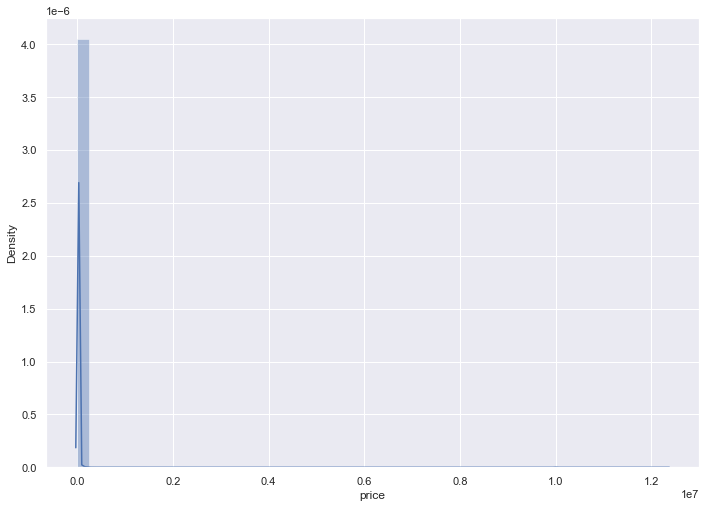

In [199]:
sns.distplot(cars['price'])    # skewness

In [200]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

<AxesSubplot:ylabel='price'>

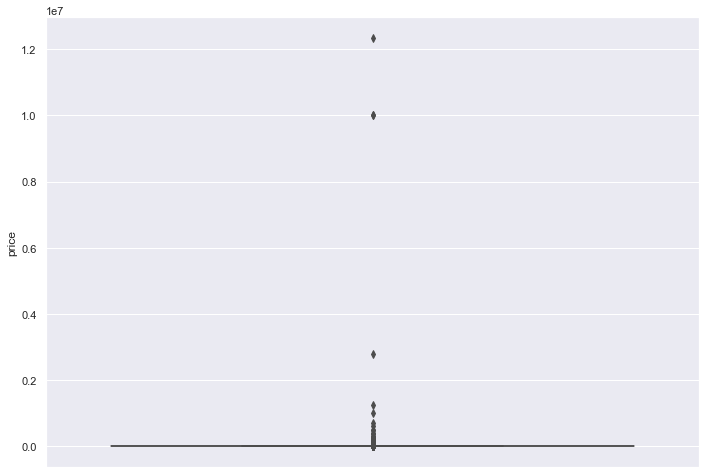

In [201]:
sns.boxplot(y=cars['price'])    # skewness

outliers => extreme in nature thus can't see behaviour of variable

In [202]:
sum(cars['price'] > 150000)

34

In [203]:
sum(cars['price'] < 100)

1748

working range of 100 - 1,50,000

In [204]:
# powerPS
power_counts = cars['powerPS'].value_counts().sort_index()
power_counts

0        5533
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64

C:\Users\teesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

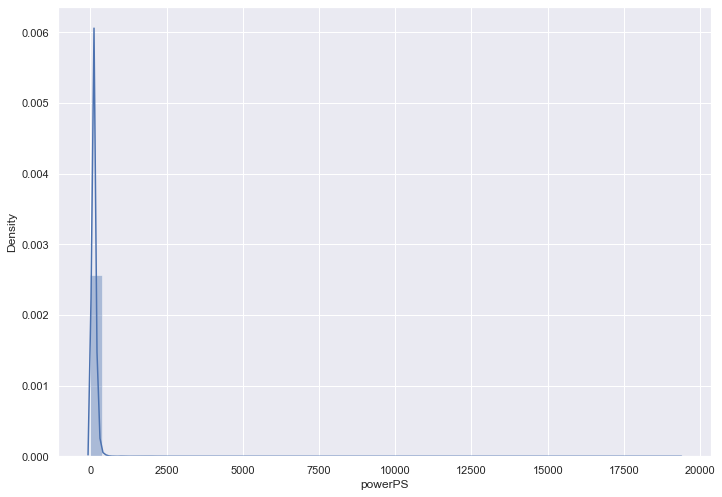

In [205]:
sns.distplot(cars['powerPS']) # skewness

In [206]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

<AxesSubplot:ylabel='powerPS'>

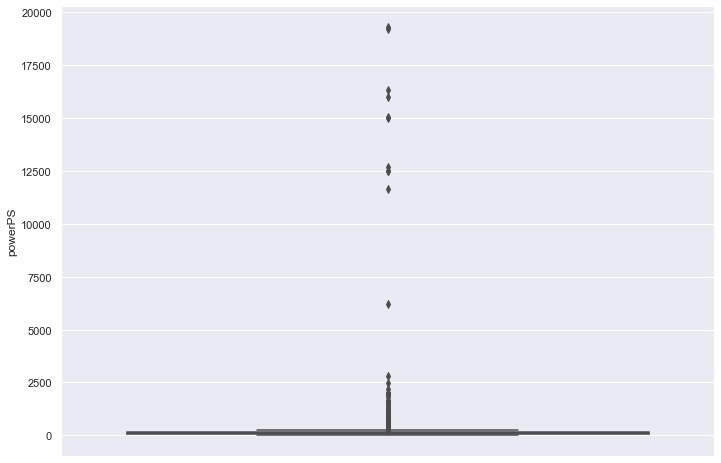

In [207]:
sns.boxplot(y=cars['powerPS'])

<AxesSubplot:xlabel='powerPS', ylabel='price'>

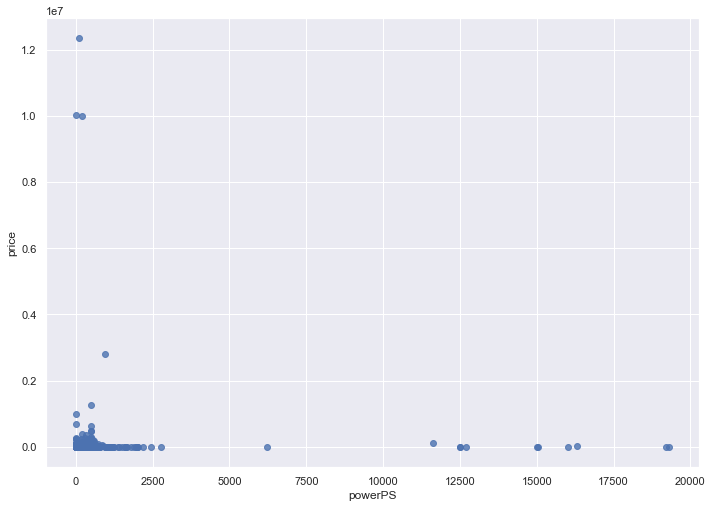

In [208]:
sns.regplot(x='powerPS' , y='price', scatter=True , fit_reg=False , data=cars)

In [209]:
sum(cars['powerPS'] > 500)

115

In [210]:
sum(cars['powerPS'] < 10)

5565

working range 10 to 500

In [211]:
cars = cars[
    (cars['yearOfRegistration'] <= 2018)
    & (cars['yearOfRegistration'] >=1950)
    & (cars['price'] <= 150000)
    & (cars['price'] >= 100)
    & (cars['powerPS'] <= 500)
    & (cars['powerPS'] >= 10)
]

In [212]:
cars.shape

(42772, 14)

In [213]:
# converting monthOfRegistration into years
cars['monthOfRegistration']/=12

In [214]:
cars['monthOfRegistration']

0       0.250
1       0.500
2       0.917
3       1.000
4       0.917
         ... 
49991   0.667
49992   0.750
49993   0.667
49995   0.250
50000   0.833
Name: monthOfRegistration, Length: 42772, dtype: float64

In [215]:
# creating new var  = 'Age' to get rid of yearOfRegistration and monthIfRegistration
cars['Age'] = (2018 - cars['yearOfRegistration'])+cars['monthOfRegistration']

In [216]:
cars

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,Age
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,0.250,diesel,bmw,NaN,15.250
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,0.500,diesel,volvo,no,13.500
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,0.917,diesel,volkswagen,NaN,15.917
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,1.000,petrol,seat,no,13.000
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,0.917,diesel,volvo,no,10.917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,0.667,petrol,bmw,no,14.667
49992,private,offer,790,test,limousine,1998,manual,82,astra,150000,0.750,diesel,opel,no,20.750
49993,private,offer,830,test,small car,1999,manual,60,clio,125000,0.667,petrol,renault,no,19.667
49995,private,offer,2290,test,station wagon,2001,manual,101,astra,150000,0.250,petrol,opel,no,17.250


In [217]:
cars['Age']=round(cars['Age'],2)

In [218]:
cars

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,Age
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,0.250,diesel,bmw,NaN,15.250
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,0.500,diesel,volvo,no,13.500
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,0.917,diesel,volkswagen,NaN,15.920
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,1.000,petrol,seat,no,13.000
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,0.917,diesel,volvo,no,10.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,0.667,petrol,bmw,no,14.670
49992,private,offer,790,test,limousine,1998,manual,82,astra,150000,0.750,diesel,opel,no,20.750
49993,private,offer,830,test,small car,1999,manual,60,clio,125000,0.667,petrol,renault,no,19.670
49995,private,offer,2290,test,station wagon,2001,manual,101,astra,150000,0.250,petrol,opel,no,17.250


In [219]:
cars['Age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

mean and median not very far of => data not skewed

In [220]:
cars = cars.drop(columns=['yearOfRegistration','monthOfRegistration'])

In [221]:
cars

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,private,offer,4450,test,limousine,manual,150,3er,150000,diesel,bmw,NaN,15.250
1,private,offer,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,private,offer,3200,test,bus,manual,101,touran,150000,diesel,volkswagen,NaN,15.920
3,private,offer,4500,control,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,private,offer,18750,test,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,manual,231,x_reihe,150000,petrol,bmw,no,14.670
49992,private,offer,790,test,limousine,manual,82,astra,150000,diesel,opel,no,20.750
49993,private,offer,830,test,small car,manual,60,clio,125000,petrol,renault,no,19.670
49995,private,offer,2290,test,station wagon,manual,101,astra,150000,petrol,opel,no,17.250


C:\Users\teesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

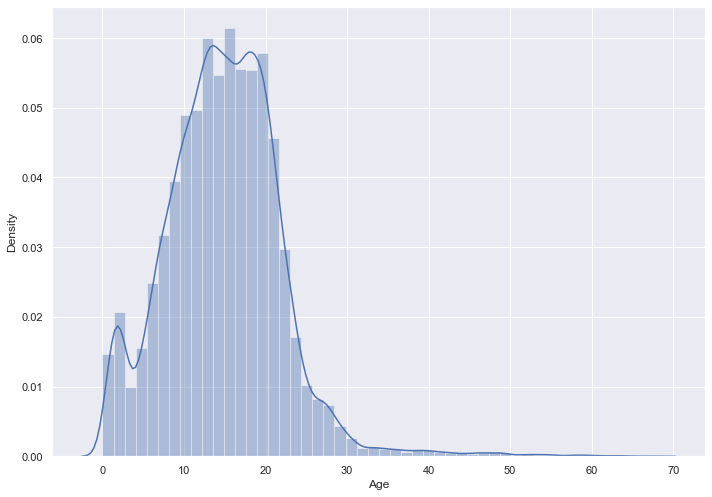

In [222]:
# age
sns.distplot(cars['Age'])

<AxesSubplot:ylabel='Age'>

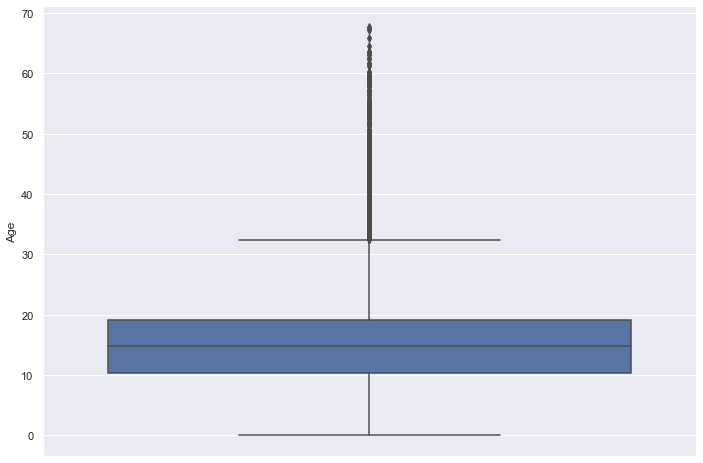

In [223]:
sns.boxplot(y=cars['Age'])

C:\Users\teesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

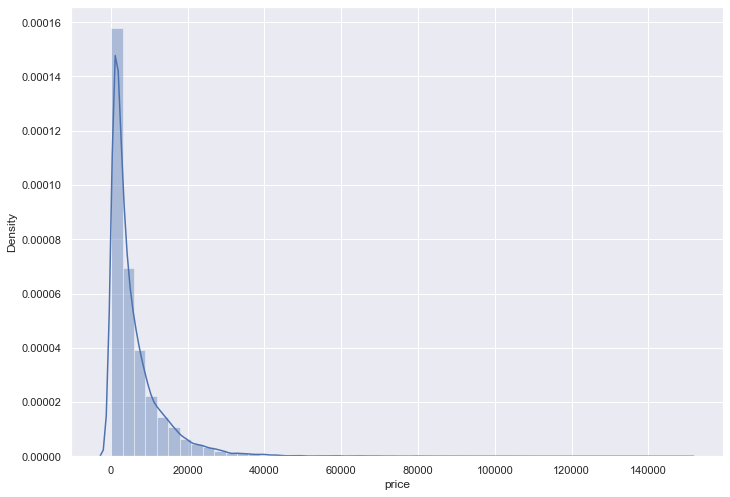

In [224]:
# price
sns.distplot(cars['price'])

<AxesSubplot:ylabel='price'>

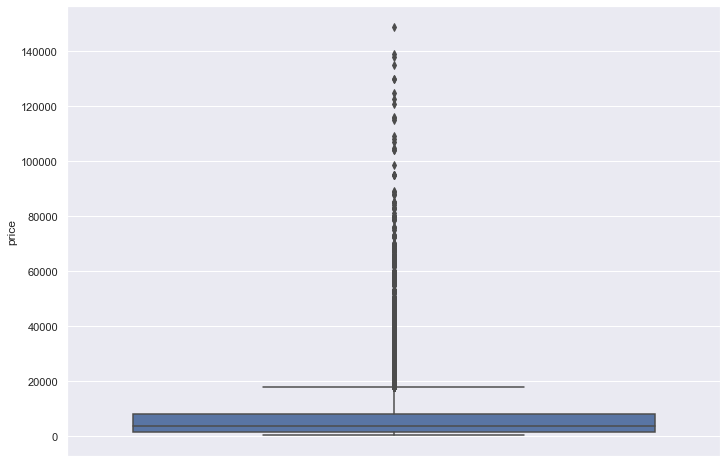

In [225]:
sns.boxplot(y=cars['price'])

C:\Users\teesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

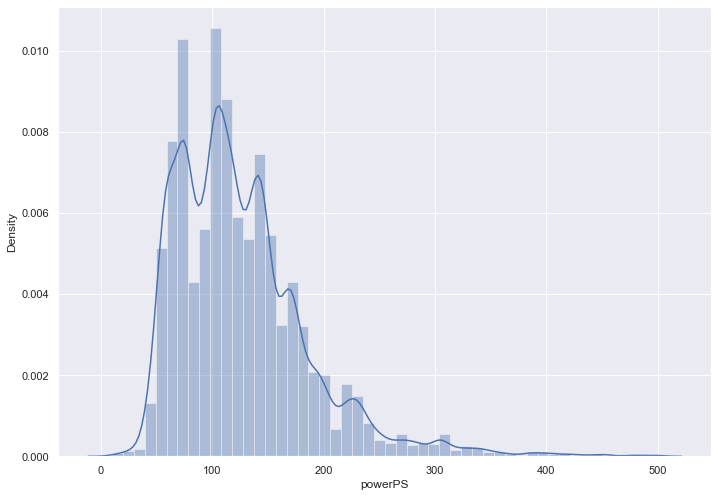

In [226]:
sns.distplot(cars['powerPS'])

<AxesSubplot:ylabel='powerPS'>

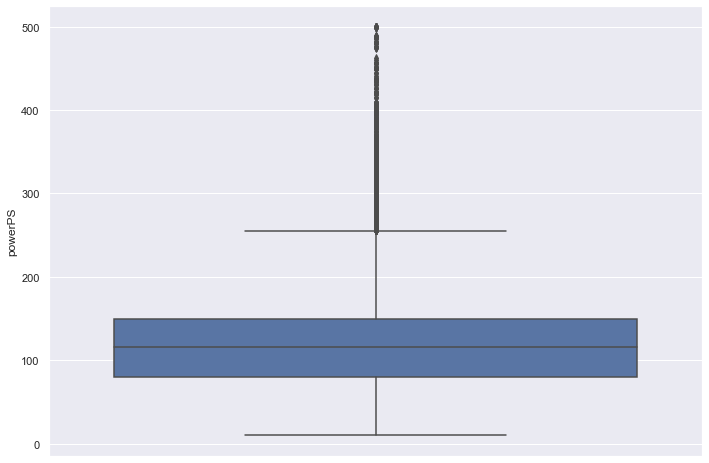

In [227]:
sns.boxplot(y=cars['powerPS'])

<AxesSubplot:xlabel='Age', ylabel='price'>

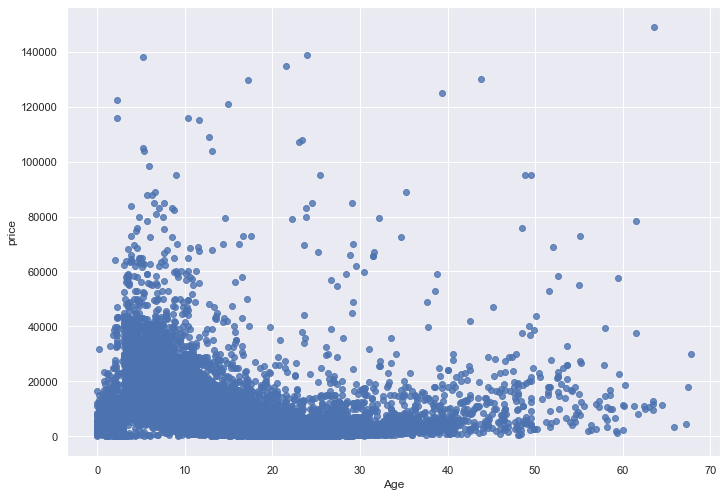

In [228]:
sns.regplot(x='Age',y='price',data=cars,fit_reg=False,scatter=True)

<AxesSubplot:xlabel='powerPS', ylabel='price'>

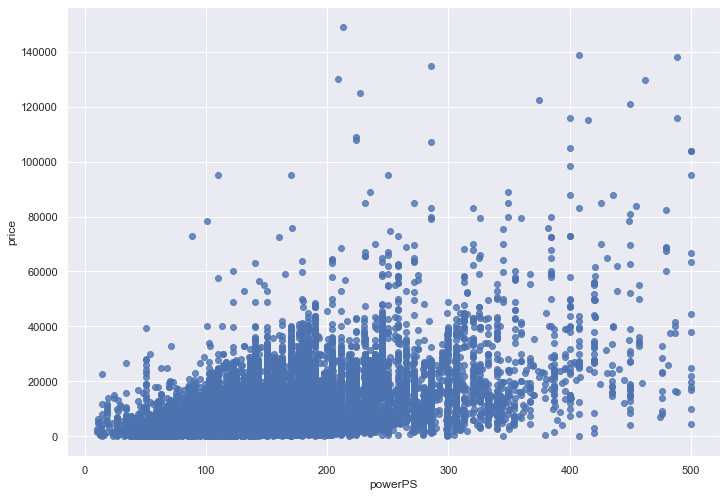

In [229]:
sns.regplot(x='powerPS',y='price',scatter=True,fit_reg=False,data=cars)

### simplifying categorical variable

In [230]:
cars.describe(include='object')

,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage
count,42772,42772,42772,39896,41978,41089,40175,42772,36495
unique,2,1,2,8,2,247,7,40,2
top,private,offer,test,limousine,manual,golf,petrol,volkswagen,no
freq,42771,42772,22128,11746,32582,3478,26509,9134,32507


In [231]:
cars['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

dropping => commercial

In [232]:
cars['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

since all values are offer => dropped

In [233]:
cars['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [234]:
pd.crosstab(index=cars['abtest'],columns='count',normalize=True)

col_0,count
abtest,
control,0.483
test,0.517


<AxesSubplot:xlabel='abtest', ylabel='count'>

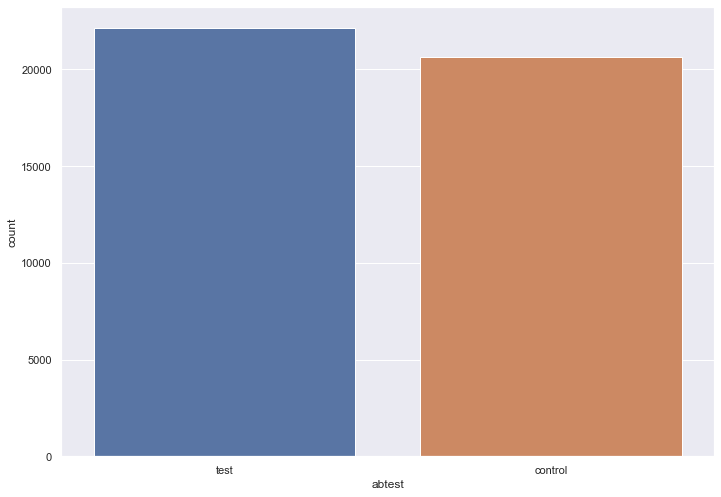

In [235]:
sns.countplot(x='abtest',data=cars)

<AxesSubplot:xlabel='abtest', ylabel='price'>

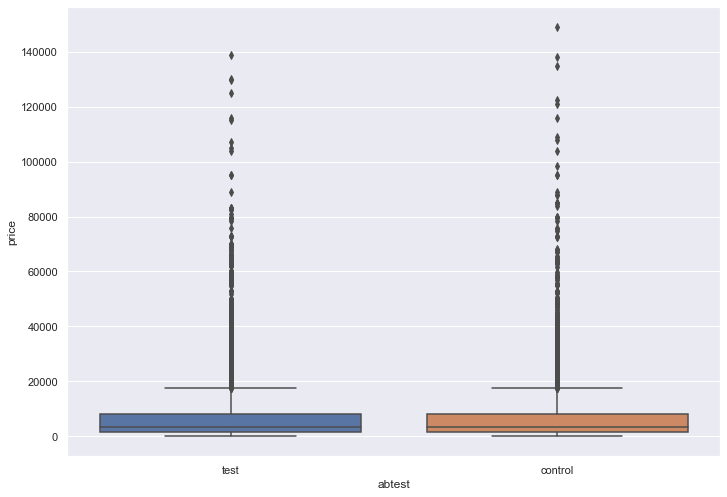

In [236]:
sns.boxplot(x='abtest',y='price',data=cars)

for every price value 50-50 distribution
doesn't much affect the price => drop

In [237]:
cars['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

In [238]:
pd.crosstab(index=cars['vehicleType'],columns='count',normalize=True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


C:\Users\teesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicleType', ylabel='count'>

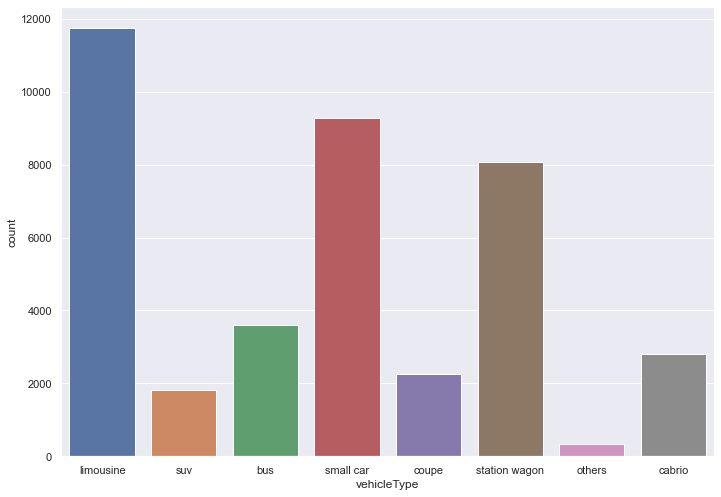

In [239]:
sns.countplot(cars['vehicleType'])

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

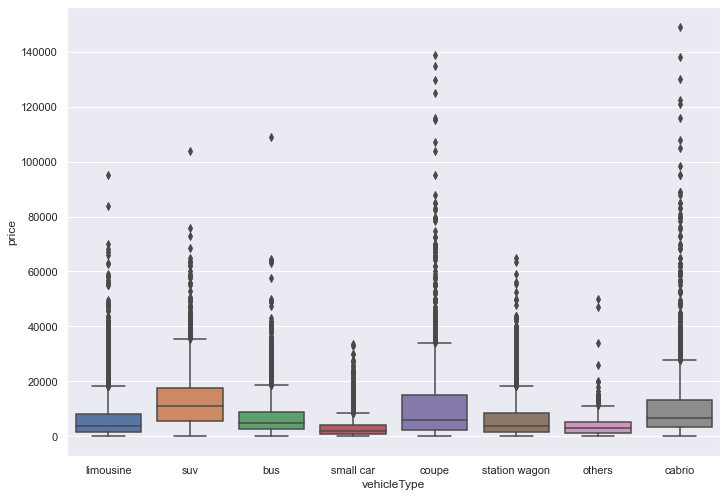

In [240]:
sns.boxplot(x='vehicleType',y='price',data=cars)

for different vehicle type different price ranges => not drop

In [241]:
print(cars['gearbox'].value_counts())

manual       32582
automatic     9396
Name: gearbox, dtype: int64


In [242]:
pd.crosstab(index=cars['gearbox'],columns='count',normalize=True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


C:\Users\teesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gearbox', ylabel='count'>

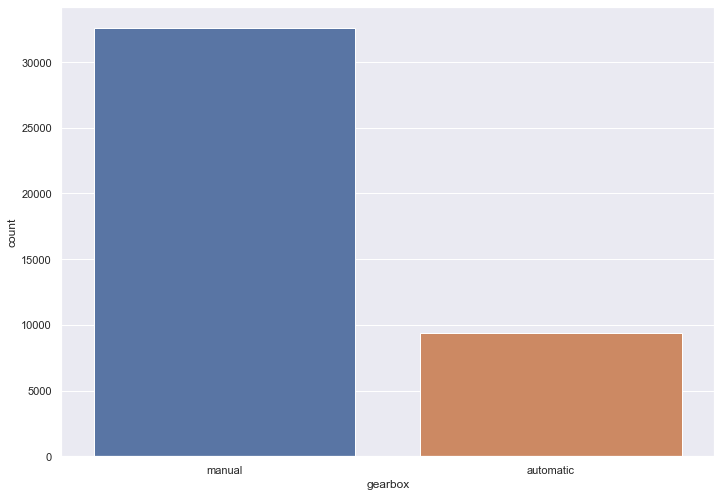

In [243]:
sns.countplot(cars['gearbox'])

<AxesSubplot:xlabel='gearbox', ylabel='price'>

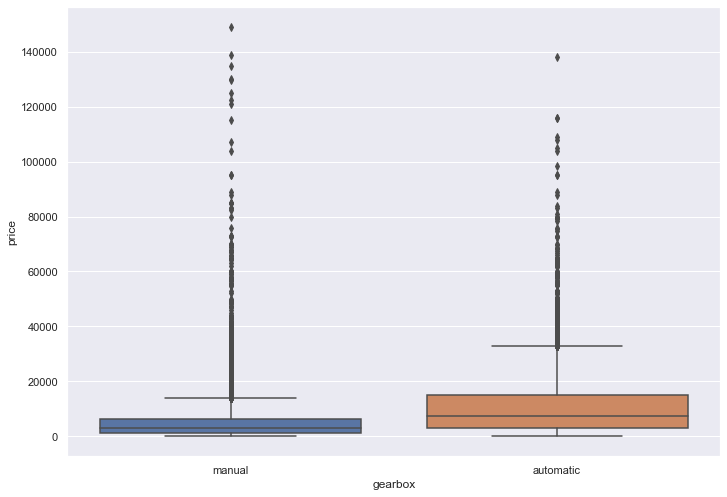

In [244]:
sns.boxplot(x='gearbox',y='price',data=cars)

gearbox affects the price => not drop

In [245]:
print(cars['model'].value_counts())

golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
b_max            1
serie_3          1
elefantino       1
charade          1
rangerover       1
Name: model, Length: 247, dtype: int64


In [246]:
# kilometer
cars['kilometer'].value_counts().sort_index()

5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64

In [247]:
pd.crosstab(index=cars['kilometer'],columns='count',normalize=True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


<AxesSubplot:xlabel='kilometer', ylabel='price'>

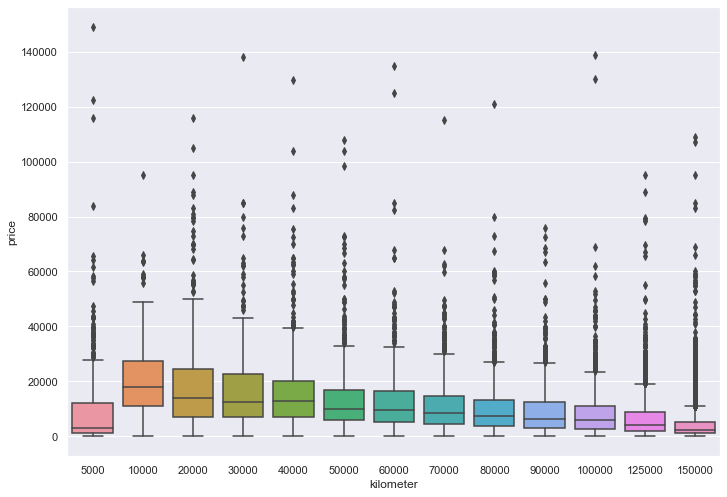

In [248]:
sns.boxplot(x='kilometer',y='price',data=cars)

kilometer affects the price => dont drop

In [249]:
print(cars['fuelType'].value_counts())

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64


In [250]:
pd.crosstab(index=cars['fuelType'],columns='count',normalize=True)

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


C:\Users\teesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuelType', ylabel='count'>

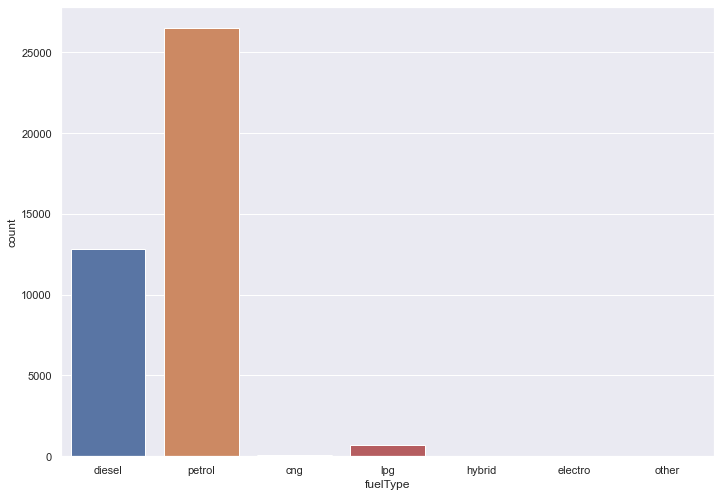

In [251]:
sns.countplot(cars['fuelType'])

<AxesSubplot:xlabel='fuelType', ylabel='price'>

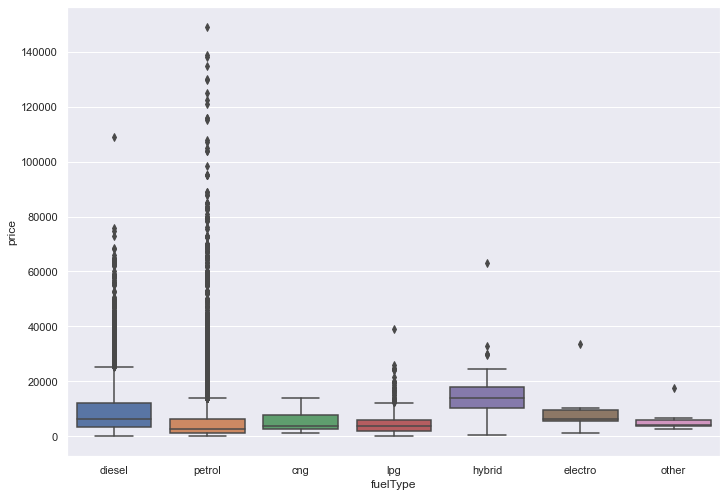

In [252]:
sns.boxplot(x='fuelType',y='price',data=cars)

fueltype affects price => dont drop

In [253]:
print(cars['brand'].value_counts())

volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
rover               53
daewoo              53
trabant             43
lada                22
Name: brand, dtype: int64


In [254]:
pd.crosstab(index=cars['brand'],columns='count',normalize=True)

col_0,count
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


C:\Users\teesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='brand', ylabel='count'>

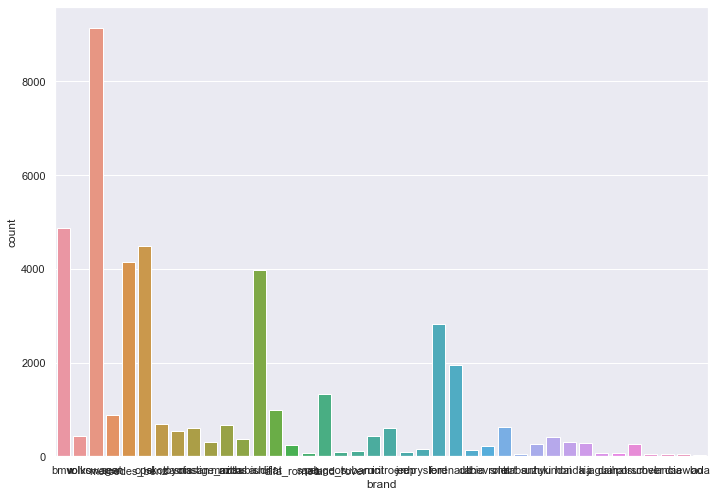

In [255]:
sns.countplot(cars['brand'])

<AxesSubplot:xlabel='price', ylabel='brand'>

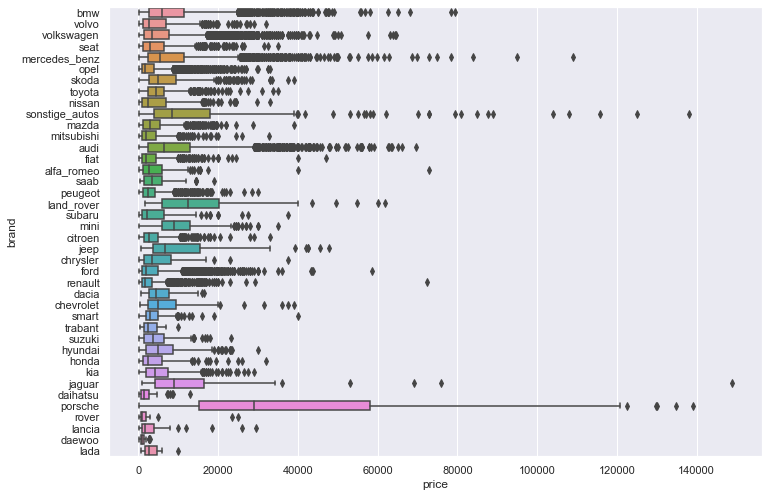

In [256]:
sns.boxplot(y='brand',x='price',data=cars)

brand of car affect the price => dont drop

In [257]:
print(cars['notRepairedDamage'].value_counts())

no     32507
yes     3988
Name: notRepairedDamage, dtype: int64


In [258]:
pd.crosstab(index=cars['notRepairedDamage'],columns='count',normalize=True)

col_0,count
notRepairedDamage,
no,0.891
yes,0.109


C:\Users\teesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='notRepairedDamage', ylabel='count'>

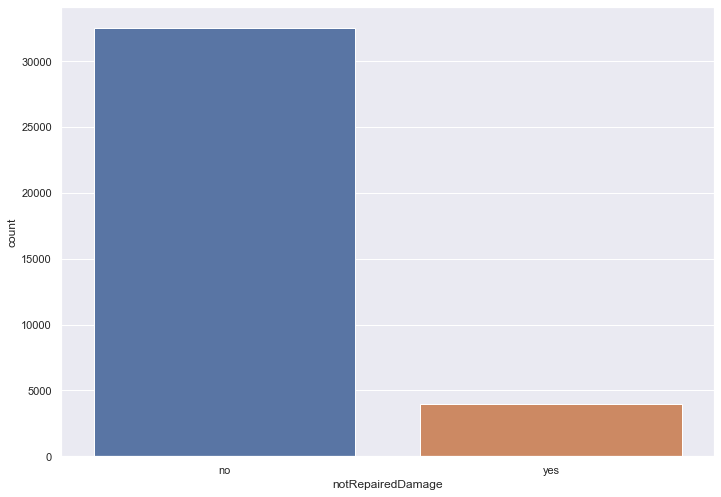

In [259]:
sns.countplot(cars['notRepairedDamage'])

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

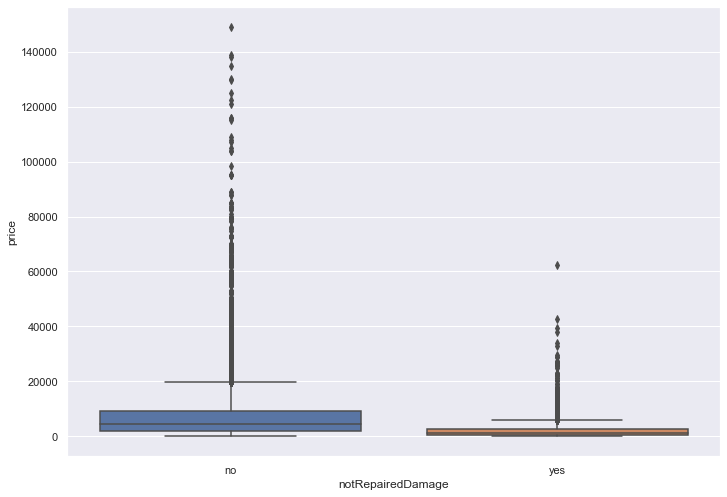

In [260]:
sns.boxplot(x='notRepairedDamage',y='price',data=cars)

cars whose damage has not been rectified are sold on lower price range => dont drop

### dropping columns

In [261]:
col = ['seller','offerType','abtest']

In [262]:
cars=cars.drop(columns=col,axis=1)

In [263]:
cars

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,4450,limousine,manual,150,3er,150000,diesel,bmw,NaN,15.250
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,3200,bus,manual,101,touran,150000,diesel,volkswagen,NaN,15.920
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920
...,...,...,...,...,...,...,...,...,...,...
49991,10900,limousine,manual,231,x_reihe,150000,petrol,bmw,no,14.670
49992,790,limousine,manual,82,astra,150000,diesel,opel,no,20.750
49993,830,small car,manual,60,clio,125000,petrol,renault,no,19.670
49995,2290,station wagon,manual,101,astra,150000,petrol,opel,no,17.250


In [264]:
cars2 = cars.copy(deep=True)

In [265]:
cars_select_num = cars.select_dtypes(exclude=[object])

In [266]:
correlation = cars_select_num.corr()

In [267]:
round(correlation,3)

,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,-0.336
powerPS,0.575,1.000,-0.016,-0.151
kilometer,-0.440,-0.016,1.000,0.292
Age,-0.336,-0.151,0.292,1.000


In [268]:
cars_select_num.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]    # fetching price columns = =>> abs() => absolute value , [1:] => remove first price row

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

powerPS have good correlated with price 

## model building
    linear regression 
    random forest regression

1. data obtained by omitting rows with any missing value
2. data obtained by imputing the missing values

In [269]:
# omitting missing rows
cars_omit = cars.dropna(axis=0)

In [270]:
cars_omit.shape

(32884, 10)

In [271]:
cars_omit.columns

Index(['price', 'vehicleType', 'gearbox', 'powerPS', 'model', 'kilometer',
       'fuelType', 'brand', 'notRepairedDamage', 'Age'],
      dtype='object')

In [272]:
cars_omit=pd.get_dummies(cars_omit,drop_first=True)

In [273]:
cars_omit

,price,powerPS,kilometer,Age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,vehicleType_suv,gearbox_manual,model_147,model_156,model_159,model_1_reihe,model_1er,model_200,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_500,model_5_reihe,model_5er,model_601,model_6_reihe,model_6er,model_7er,model_80,model_850,model_90,model_900,model_9000,model_911,model_a1,model_a2,model_a3,model_a4,model_a5,model_a6,model_a8,model_a_klasse,model_accord,model_agila,model_alhambra,model_almera,model_altea,model_amarok,model_antara,model_arosa,model_astra,model_auris,model_avensis,model_aveo,model_aygo,model_b_klasse,model_b_max,model_beetle,model_berlingo,model_bora,model_boxster,model_bravo,model_c1,model_c2,model_c3,model_c4,model_c5,model_c_klasse,model_c_max,model_c_reihe,model_caddy,model_calibra,model_captiva,model_carisma,model_carnival,model_cayenne,model_cc,model_ceed,model_charade,model_cherokee,model_citigo,model_civic,model_cl,model_clio,model_clk,model_clubman,model_colt,model_combo,model_cooper,model_cordoba,model_corolla,model_corsa,model_cr_reihe,model_croma,model_crossfire,model_cuore,model_cx_reihe,model_defender,model_delta,model_discovery,model_doblo,model_ducato,model_duster,model_e_klasse,model_eos,model_escort,model_espace,model_exeo,model_fabia,model_fiesta,model_focus,model_forester,model_forfour,model_fortwo,model_fox,model_freelander,model_fusion,model_g_klasse,model_galant,model_galaxy,model_getz,model_gl,model_glk,model_golf,model_grand,model_i3,model_i_reihe,model_ibiza,model_impreza,model_insignia,model_jazz,model_jetta,model_jimny,model_juke,model_justy,model_ka,model_kadett,model_kaefer,model_kalina,model_kalos,model_kangoo,model_kuga,model_laguna,model_lancer,model_lanos,model_legacy,model_leon,model_lodgy,model_logan,model_lupo,model_lybra,model_m_klasse,model_m_reihe,model_materia,model_matiz,model_megane,model_meriva,model_micra,model_mii,model_modus,model_mondeo,model_move,model_musa,model_mustang,model_mx_reihe,model_navara,model_niva,model_note,model_nubira,model_octavia,model_omega,model_one,model_others,model_outlander,model_pajero,model_panda,model_passat,model_phaeton,model_picanto,model_polo,model_primera,model_ptcruiser,model_punto,model_q3,model_q5,model_q7,model_qashqai,model_r19,model_range_rover,model_range_rover_evoque,model_range_rover_sport,model_rangerover,model_rav,model_rio,model_roadster,model_roomster,model_rx_reihe,model_s60,model_s_klasse,model_s_max,model_s_type,model_sandero,model_santa,model_scenic,model_scirocco,model_seicento,model_serie_2,model_serie_3,model_sharan,model_signum,model_sirion,model_sl,model_slk,model_sorento,model_spark,model_spider,model_sportage,model_sprinter,model_stilo,model_superb,model_swift,model_terios,model_tigra,model_tiguan,model_toledo,model_touareg,model_touran,model_transit,model_transporter,model_tt,model_tucson,model_twingo,model_up,model_v40,model_v50,model_v60,model_v70,model_v_klasse,model_vectra,model_verso,model_viano,model_vito,model_vivaro,model_voyager,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
1,13299,163,150000,13.500,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [274]:
# importing necessary library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [275]:
# seperating input and output features
x1 = cars_omit.drop(['price'], axis='columns',inplace=False)
y1 = cars_omit['price']

In [276]:
prices = pd.DataFrame({"1. Before":y1,"2. After":np.log(y1)})

In [277]:
prices

,1. Before,2. After
1,13299,9.495
3,4500,8.412
4,18750,9.839
5,988,6.896
7,1399,7.244
...,...,...
49991,10900,9.297
49992,790,6.672
49993,830,6.721
49995,2290,7.736


array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

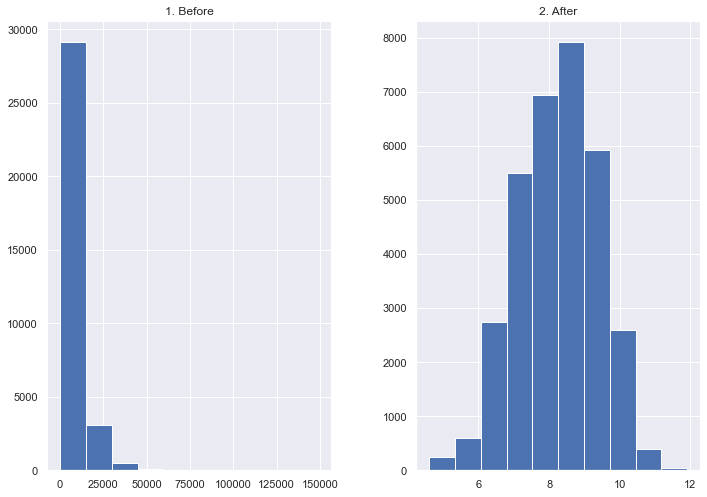

In [278]:
prices.hist()

In [279]:
# since range of price is huge we are taking log so that it becomes easy to evaluate
# transforming price as numerical variable
y1 = np.log(y1)

In [280]:
# splitting data into train and test
train_x,test_x,train_y,test_y = train_test_split(x1,y1,test_size=0.3,random_state=3)    # random state => every time we run this model same set of values are going under train and test

In [281]:
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


In [282]:
23018/32884 , 9866/32884

(0.6999756720593602, 0.3000243279406398)

70% data under train and 30% data under test

In [283]:
# baseline model for omitted data
# predicted value replaced by mean value of test data
# finding the mean for test data value
base_pred = np.mean(test_y)
print(base_pred)

8.249615787653337


In [284]:
# replicating same value till length of test data
base_pred = np.repeat(base_pred,len(test_y))

In [285]:
#finding RMSE => sqrt of mean squared error
base_root_mean_square_error = np.sqrt(mean_squared_error(test_y,base_pred))

In [286]:
print(base_root_mean_square_error)

1.1274483657478247


###################### Linear Regression Model for omitted data #####################################33

In [287]:
# linear regression with omitted data
# setting intercept as true
lgr = LinearRegression(fit_intercept=True)

In [288]:
model_lin1 = lgr.fit(train_x,train_y)

In [289]:
# predicting model on test set
cars_predictions_lin1 = lgr.predict(test_x)

In [290]:
print(cars_predictions_lin1)

[8.43257524 9.78032094 8.84198777 ... 8.7016597  7.50062221 7.90248496]


In [291]:
# computing MSE and RMSE
lin_mse1 = mean_squared_error(test_y,cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.5455481266513857


In [292]:
# R squared value => how good your model is to explain the availability in y
r2_lin_test1 = model_lin1.score(test_x,test_y)
r2_lin_train1 = model_lin1.score(train_x,train_y)
print(r2_lin_test1,r2_lin_train1)

0.7658615091649229 0.7800936978183916


In [293]:
# regression diagnostics - diff between pred and actual value
residuals1 = test_y-cars_predictions_lin1

<AxesSubplot:ylabel='price'>

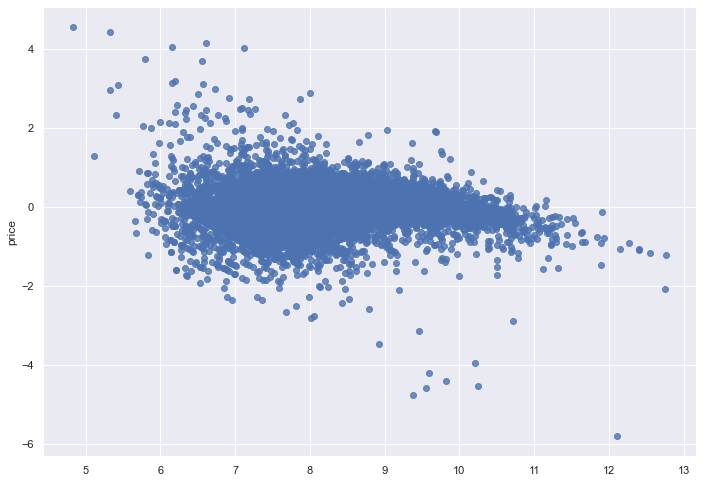

In [294]:
sns.regplot(x=cars_predictions_lin1,y=residuals1,scatter=True,fit_reg=False,data=cars)

residuals must be closer to 0 => signifies that predictid and actual value very close

In [295]:
residuals1.describe()

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

################# Random Forest Model for omitted data #######################

In [296]:
# random forest with omitted data
# model parameters
rf = RandomForestRegressor(n_estimators=100,max_features='auto',\
                           max_depth=100,min_samples_split=10,min_samples_leaf=4,random_state = 1)

In [297]:
# model
model_rf1 = rf.fit(train_x,train_y)

In [298]:
# predicting model on test set
cars_predictions_rf1 = rf.predict(test_x)

In [299]:
# computing MSE and RMSE
rf_mse1 = mean_squared_error(test_y,cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.4360736289370223


In [300]:
# R squared value
r2_rf_train1 = model_rf1.score(train_x,train_y)
r2_rf_test1 = model_rf1.score(test_x,test_y)
print(r2_rf_train1,r2_rf_test1)

0.9202494705146291 0.8504018147750623


#### random forest giving better accuracy than linear regression

In [301]:
# model building with imputed data
cars_imputed = cars.apply(lambda x: x.fillna(x.median()) if x.dtypes=='float' else x.fillna(x.value_counts().index[0]))

In [302]:
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [303]:
# converting categorical variable into dummy variables
cars_imputed = pd.get_dummies(cars_imputed,drop_first=True)

In [304]:
# building model with imputed data
x2 = cars_imputed.drop(['price'],axis='columns',inplace=False)
y2 = cars_imputed['price']

array([[<AxesSubplot:title={'center':'1. Before '}>,
        <AxesSubplot:title={'center':'2. After '}>]], dtype=object)

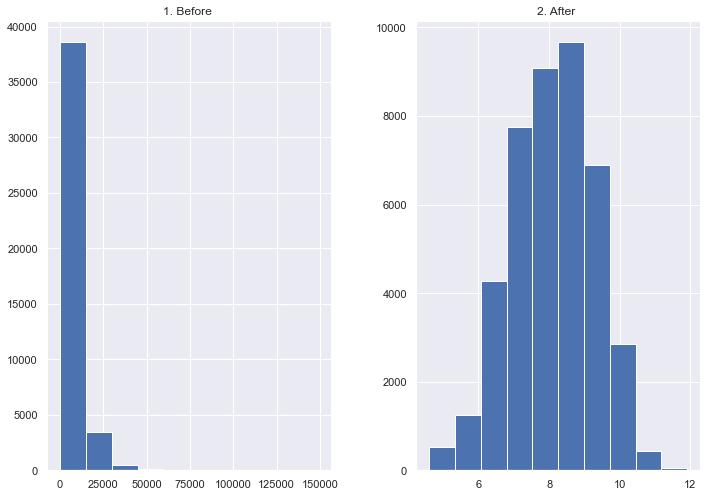

In [305]:
prices = pd.DataFrame({'1. Before ': y2,"2. After ": np.log(y2)})
prices.hist()

all distributions normally distributed in log(y2) => prefer that

In [306]:
y2 = np.log(y2)

In [307]:
train_x1,test_x1,train_y1,test_y1 = train_test_split(x2,y2,random_state=3,test_size=0.3)
print(train_x1.shape,test_x1.shape,train_y1.shape,test_y1.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


In [308]:
# baseline model 
base_pred1 = np.mean(test_y1)
print(base_pred1)

8.068391740519193


In [309]:
base_pred1 = np.repeat(base_pred1,len(test_y1))

In [310]:
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(test_y1,base_pred1))
print(base_root_mean_square_error_imputed)

1.1884349112889792


################### Linear Regression Model For Imputed Data #######################

In [311]:
# linear regression with imputed data
# setting intercept as true
lgr2 = LinearRegression(fit_intercept = True)

In [312]:
# model
model_lin2 = lgr2.fit(train_x1,train_y1)

In [313]:
# predicting model on test set
cars_predictions_lin2 = lgr2.predict(test_x1)

In [314]:
# computing MSE and RMSE
lin_mse2 = mean_squared_error(test_y1,cars_predictions_lin2)
lin_rmse2 = np.square(lin_mse2)
print(lin_rmse2)

0.17675038019434808


#### RMSE value gone down earlier => 0.56 for omitted data

## error have decreased

In [315]:
r2_lin_train2 = model_lin2.score(test_x1,test_y1)
r2_lin_test2 = model_lin2.score(train_x1,train_y1)
print(r2_lin_train2,r2_lin_test2)

0.7023339008631185 0.7071658736894363


######################## Random Forest Model For Imputed Data ############################

In [316]:
# random forest model
# model parameters
rf2 = RandomForestRegressor(n_estimators = 100,max_features='auto',\
                            max_depth=100,min_samples_split=10,min_samples_leaf=4,random_state=1)

In [317]:
# model
model_rf2 = rf2.fit(train_x1,train_y1)

In [318]:
# predicting model on test set
cars_predictions_rf2 = rf2.predict(test_x1)

In [319]:
# computing MSE and RSME
rf_mse2 = mean_squared_error(test_y1,cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

0.494313994408829


In [320]:
r2_rf_test2 = model_rf2.score(train_x1,train_y1)
r2_rf_train2 = model_rf2.score(test_x1,test_y1)
print(r2_rf_train2,r2_rf_test2)

0.8269964521311131 0.9024289431669166


## CONCLUSION

In [321]:
print('Matrics model build from data where missing values were omitted')
print('R squared value for train from Linear Regression    =    %s' % r2_lin_train1)
print('R squared value for test from Linear Regression    =    %s' % r2_lin_test1)
print('R squared value for train from Random Forest    =    %s' % r2_rf_train1)
print('R squared value for test from Random Forest    =    %s' % r2_rf_test1)
print('Base RMSE of model for omitted data    =    %s' %base_root_mean_square_error)
print('RMSE value for test from Linear Regression    =    %s' % lin_rmse1)
print('RMSE value for test from random Forest    =    %s' % rf_rmse1)

Matrics model build from data where missing values were omitted
R squared value for train from Linear Regression    =    0.7800936978183916
R squared value for test from Linear Regression    =    0.7658615091649229
R squared value for train from Random Forest    =    0.9202494705146291
R squared value for test from Random Forest    =    0.8504018147750623
Base RMSE of model for omitted data    =    1.1274483657478247
RMSE value for test from Linear Regression    =    0.5455481266513857
RMSE value for test from random Forest    =    0.4360736289370223


## Random Forest Model performing much better on omiited data as compared to Linear Regression Model

In [322]:
print('Matrics model build from data where missing values were imputed')
print('R squared value for train from Linear Regression    =    %s' % r2_lin_train2)
print('R squared value for test from Linear Regression    =    %s' % r2_lin_test2)
print('R squared value for train from Random Forest    =    %s' % r2_rf_train2)
print('R squared value for test from Random Forest    =    %s' % r2_rf_test2)
print('Base RMSE of model for imputed data    =    %s' %base_root_mean_square_error_imputed)
print('RMSE value for test from Linear Regression    =    %s' % lin_rmse2)
print('RMSE value for test from random Forest    =    %s' % rf_rmse2)

Matrics model build from data where missing values were imputed
R squared value for train from Linear Regression    =    0.7023339008631185
R squared value for test from Linear Regression    =    0.7071658736894363
R squared value for train from Random Forest    =    0.8269964521311131
R squared value for test from Random Forest    =    0.9024289431669166
Base RMSE of model for imputed data    =    1.1884349112889792
RMSE value for test from Linear Regression    =    0.17675038019434808
RMSE value for test from random Forest    =    0.494313994408829


## Random Forest Model performing better on imputed data as well in comparison to Linear Regression

In [323]:
import pickle

In [324]:
filename = 'cars_price_pred_model'
pickle.dump(model_rf1,open(filename,'wb'))

#### Loading model from file into ML program and do prediction

In [325]:
loaded_model = pickle.load(open(filename,'rb'))

In [326]:
loaded_model.predict(test_x)

array([8.70182348, 9.57250428, 8.19505376, ..., 9.11387352, 7.45210229,
       7.80044374])

In [327]:
test_x

,powerPS,kilometer,Age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,vehicleType_suv,gearbox_manual,model_147,model_156,model_159,model_1_reihe,model_1er,model_200,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_500,model_5_reihe,model_5er,model_601,model_6_reihe,model_6er,model_7er,model_80,model_850,model_90,model_900,model_9000,model_911,model_a1,model_a2,model_a3,model_a4,model_a5,model_a6,model_a8,model_a_klasse,model_accord,model_agila,model_alhambra,model_almera,model_altea,model_amarok,model_antara,model_arosa,model_astra,model_auris,model_avensis,model_aveo,model_aygo,model_b_klasse,model_b_max,model_beetle,model_berlingo,model_bora,model_boxster,model_bravo,model_c1,model_c2,model_c3,model_c4,model_c5,model_c_klasse,model_c_max,model_c_reihe,model_caddy,model_calibra,model_captiva,model_carisma,model_carnival,model_cayenne,model_cc,model_ceed,model_charade,model_cherokee,model_citigo,model_civic,model_cl,model_clio,model_clk,model_clubman,model_colt,model_combo,model_cooper,model_cordoba,model_corolla,model_corsa,model_cr_reihe,model_croma,model_crossfire,model_cuore,model_cx_reihe,model_defender,model_delta,model_discovery,model_doblo,model_ducato,model_duster,model_e_klasse,model_eos,model_escort,model_espace,model_exeo,model_fabia,model_fiesta,model_focus,model_forester,model_forfour,model_fortwo,model_fox,model_freelander,model_fusion,model_g_klasse,model_galant,model_galaxy,model_getz,model_gl,model_glk,model_golf,model_grand,model_i3,model_i_reihe,model_ibiza,model_impreza,model_insignia,model_jazz,model_jetta,model_jimny,model_juke,model_justy,model_ka,model_kadett,model_kaefer,model_kalina,model_kalos,model_kangoo,model_kuga,model_laguna,model_lancer,model_lanos,model_legacy,model_leon,model_lodgy,model_logan,model_lupo,model_lybra,model_m_klasse,model_m_reihe,model_materia,model_matiz,model_megane,model_meriva,model_micra,model_mii,model_modus,model_mondeo,model_move,model_musa,model_mustang,model_mx_reihe,model_navara,model_niva,model_note,model_nubira,model_octavia,model_omega,model_one,model_others,model_outlander,model_pajero,model_panda,model_passat,model_phaeton,model_picanto,model_polo,model_primera,model_ptcruiser,model_punto,model_q3,model_q5,model_q7,model_qashqai,model_r19,model_range_rover,model_range_rover_evoque,model_range_rover_sport,model_rangerover,model_rav,model_rio,model_roadster,model_roomster,model_rx_reihe,model_s60,model_s_klasse,model_s_max,model_s_type,model_sandero,model_santa,model_scenic,model_scirocco,model_seicento,model_serie_2,model_serie_3,model_sharan,model_signum,model_sirion,model_sl,model_slk,model_sorento,model_spark,model_spider,model_sportage,model_sprinter,model_stilo,model_superb,model_swift,model_terios,model_tigra,model_tiguan,model_toledo,model_touareg,model_touran,model_transit,model_transporter,model_tt,model_tucson,model_twingo,model_up,model_v40,model_v50,model_v60,model_v70,model_v_klasse,model_vectra,model_verso,model_viano,model_vito,model_vivaro,model_voyager,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
10171,250,150000,13.170,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [328]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()
ohe.fit(x1[[]])